In [10]:
import numpy as np # linear algebra
import pandas as pd # processing data 
import matplotlib.pyplot as plt 
import seaborn as sns # visualization tool
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [11]:
dataset = pd.read_csv('BlackFriday.csv')
dataset.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [12]:
# remove NaN values and set it to 0
dataset.Product_Category_2.fillna(0, inplace=True)
dataset.Product_Category_3.fillna(0, inplace=True)

dataset.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,0.0,0.0,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,0.0,0.0,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,0.0,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,0.0,0.0,7969


In [13]:
# Categorised String data like City_Category, Age and Gender to numeric data
dataset['City_Category'] = dataset['City_Category'].astype('category').cat.codes
dataset['Age'] = dataset['Age'].astype('category').cat.codes
dataset['Gender'] = dataset['Gender'].astype('category').cat.codes
dataset['Stay_In_Current_City_Years'] = dataset['Stay_In_Current_City_Years'].astype('category').cat.codes
dataset.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,0,10,0,2,0,3,0.0,0.0,8370
1,1000001,P00248942,0,0,10,0,2,0,1,6.0,14.0,15200
2,1000001,P00087842,0,0,10,0,2,0,12,0.0,0.0,1422
3,1000001,P00085442,0,0,10,0,2,0,12,14.0,0.0,1057
4,1000002,P00285442,1,6,16,2,4,0,8,0.0,0.0,7969


In [14]:
# Separated input(X) and output(Y)
X = dataset.iloc[:, 2:-1]
Y = dataset.iloc[:, -1]

X_train = np.asarray(X)
Y_train = np.asarray(Y)

y_train_re = Y_train.reshape(-1, 1)
X_train.shape

(537577, 9)

In [15]:
#Deleted irrelevant data like the User_ID and Product_IDfrom the dataset
#cols = ['User_ID', 'Product_ID']
#dataset.drop(cols, inplace=True, axis=1)
y_train_re.shape

(537577, 1)

In [16]:
def cal_cost(theta, Xb, y):
    '''
    Calculates the cost for given X and Y. The following shows a single dimensional X
    theta = Vector of thetas
    Xb = Row of Xb's 
    y = Actual y's 
    
    where:
        j is the no of features
    '''
    
    m = len(y)
    
    predictions = Xb.dot(theta)
    cost = (1/2*m) * np.sum(np.square(predictions - y))
    
    return cost

In [17]:
def gradient_descent(Xb, y, theta, learning_rate=0.01, iterations=100):
    '''
    Xb = Matrix of X with added bias units
    y = Vector of Y
    theta = Vector of thetas np.random.randn(j,1)
    learning_rate
    iterations = no of iterations
    
    Returns the final theta vector and array of cost history over no of iterations
    '''
    m = len(y)
    cost_history = np.zeros(iterations)
    theta_history = np.zeros((iterations, 10))
    for it in range(iterations):
        prediction = np.dot(Xb, theta)
        
        theta = theta - (1/m) * learning_rate * (Xb.T.dot((prediction - y)))
        theta_history[it, :] = theta.T
        cost_history[it] = cal_cost(theta, Xb, y)
    
    return theta, cost_history, theta_history

In [18]:
lr = 0.01
n_iter = 1000

theta = np.random.randn(10,1)
X_b = np.c_[np.ones((len(X_train), 1)), X_train]

theta, cost_history, theta_history = gradient_descent(X_b, y_train_re, theta, lr, n_iter)

print("Theta0: ", theta)
print("Final cost/MSE: ", cost_history[-1])

Theta0:  [[ -15033.56569453]
 [ -13497.29147194]
 [ -50337.83931354]
 [-202949.42653254]
 [ -20078.37767759]
 [ -36897.05163258]
 [  -8041.17925766]
 [-106829.44856818]
 [-167286.24194625]
 [ -92889.25997124]]
Final cost/MSE:  2.7346365756193266e+24


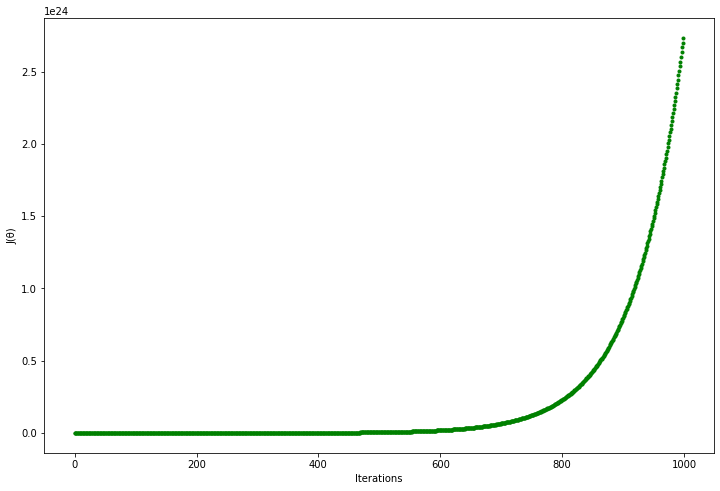

In [19]:
fig, ax = plt.subplots(figsize=(12, 8))

ax.set_ylabel('J(θ)')
ax.set_xlabel('Iterations')
grp = ax.plot(range(n_iter), cost_history, 'g.')
#grp = ax.plot(range(200), cost_history[:200], 'g.')

In [20]:
def stocashtic_gradient_descent(X, y, theta, learning_rate=0.01, iterations=10):
    '''
    X = Matrix of X with added bias units
    y = Vector of Y
    theta = Vector of thetas np.random.randn(j, 1)
    learning_rate
    iterations = No. of iterations
    
    Returns the final theta vector and array of cost history over the no. of iterations
    '''
    
    m = len(y)
    cost_history = np.zeros(iterations)
    
    for it in range(iterations):
        cost = 0.0
        for i in range(m):
            rand_int = np.random.randint(0, m)
            X_i = X[rand_int, :].reshape(1, X.shape[1])
            Y_i = y[rand_int].reshape(1, 1)
            
            predictions = np.dot(X_i, theta)
            
            theta = theta - (1/m) * learning_rate * (X_i.T.dot((predictions - Y_i)))
            cost += cal_cost(theta, X_i, Y_i)
        cost_history[it] = cost
        
    return theta, cost_history
                                                     

In [21]:
lr = 0.5
n_iter = 50

theta = np.random.randn(10,1)
X_b = np.c_[np.ones((len(X_train), 1)), X_train]

theta, cost_history = stocashtic_gradient_descent(X_b, y_train_re, theta, lr, n_iter)

print("Theta: ", theta)
print("Final cost/MSE: ", cost_history[-1])

Theta:  [[7402.95410476]
 [1113.24936683]
 [ 216.65230239]
 [  15.27447827]
 [ 519.46388188]
 [ 135.79454479]
 [  45.8736308 ]
 [-260.92332599]
 [  23.16348143]
 [ 173.4096852 ]]
Final cost/MSE:  5836294490160.797


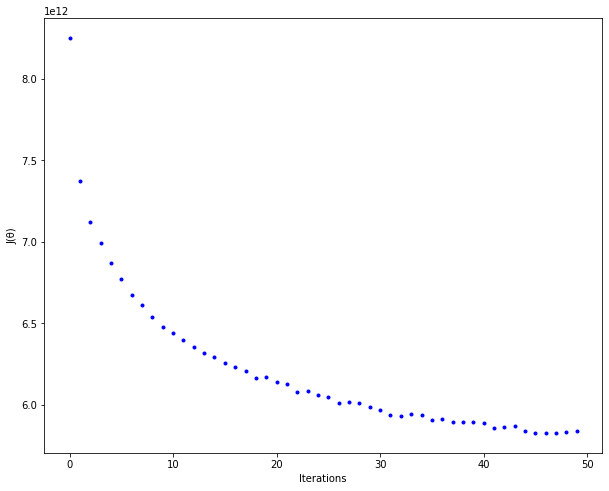

In [22]:
fig, ax = plt.subplots(figsize=(10, 8))
ax.set_ylabel('J(θ)')
ax.set_xlabel('Iterations')
theta = np.random.randn(10, 1)

grp1 = ax.plot(range(n_iter), cost_history, 'b.') 

In [23]:
X_new = np.asarray(X)
X_new[117220]

array([ 1.,  3., 12.,  2.,  2.,  1.,  1.,  2.,  0.])

In [24]:
def min_batch_grad_desc(X, y, theta, learning_rate=0.01, iterations=10, batch_size=20):
    '''
    X = Matrix of X without added bias units
    y = Vector of Y
    theta = Vector of thetas np.random.randn(j, 1)
    learning_rate
    iterations = no. of iterations
    
    Returns the final theta vector array of cost history over no. of iterations
    '''
    
    m = len(y)
    cost_history = np.zeros(iterations)
    n_batches = int(m/batch_size)
    
    for it in range(iterations):
        cost =0.0
        indices = np.random.permutation(m)
        
        X = X[indices]
        y = y[indices]
        
        for i in range(0,m,batch_size):
            X_i = X[i:i+batch_size]
            y_i = y[i:i+batch_size]
            
            X_i = np.c_[np.ones(len(X_i)),X_i]
           
            prediction = np.dot(X_i,theta)

            theta = theta -(1/m)*learning_rate*( X_i.T.dot((prediction - y_i)))
            cost += cal_cost(theta,X_i,y_i)
        cost_history[it]  = cost
        
    return theta, cost_history

In [61]:
lr = 0.1
n_iter = 200

theta = np.random.randn(10, 1)

theta, cost_history = min_batch_grad_desc(X_train, y_train_re, theta, lr, n_iter)

print('Theta: ', theta)
print('Cost History: ', cost_history[-1])

Theta:  [[6749.62886959]
 [1308.85381929]
 [ 262.08373821]
 [  22.67203402]
 [ 585.12408222]
 [ 174.82979492]
 [  81.91325216]
 [-239.670741  ]
 [  32.73389118]
 [ 176.22267795]]
Cost History:  117678953682121.11


In [1]:
fig, ax = plt.subplots(figsize=(10,8))
ax.set_ylabel('{ J(θ) }')
ax.set_x_label('{ Iterations }')
theta = np.random.randn(10, 1)

grp2 = ax.plot(range(n_iter), cost_history, 'r.')

NameError: name 'plt' is not defined